<a href="https://colab.research.google.com/github/AhmedHesham34/Bike-sharing-demand/blob/main/notebook311798bc2e1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 6.7 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

### Setup Kaggle API Key

In [ ]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "ahmedhesham34"
kaggle_key = "661293654ca1795db77a0e9f31cec0b9"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 55.7MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("/content/train.csv", parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("/content/train.csv", parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Same thing as train and test dataset
submission = pd.read_csv("/content/sampleSubmission.csv", parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])],time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220722_034548/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220722_034548/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.964349      20.258525  532.880936                0.000768           0.321178            3       True         15
1          CatBoost_BAG_L2  -30.235169      18.452526  477.317315                0.126265          79.998602            2       True         13
2          LightGBM_BAG_L2  -30.428891      18.735031  420.426934                0.408771          23.108221            2       True         11
3        LightGBMXT_BAG_L2  -30.868169      19.722721  429.452935                1.396461          32.134222            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.402604      18.990517  407.182210                0.664256           9.863497            2       True         14
5   RandomForestMSE_BAG_L2  -31.645854      18.996609  430.258249         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -29.964349      20.258525  532.880936   
 1          CatBoost_BAG_L2  -30.235169      18.452526  477.317315   
 2          LightGBM_BAG_L2  -30.428891      18.735031  420.426934   
 3        LightGBMXT_BAG_L2  -30.868169      19.722721  429.452935   
 4     ExtraTreesMSE_BAG_L2  -31.402604      18.990517  407.182210   
 5   RandomForestMSE_BAG_L2  -31.645854      18.996609  430.258249   
 6      WeightedEnsemble_L2  -32.179594      17.224258  353.768145   
 7          LightGBM_BAG_L1  -33.919639       2.939416   40.263486   
 8          CatBoost_BAG_L1  -34.065035       0.202739  198.559993   
 9        LightGBMXT_BAG_L1  -34.457274      13.390202  100.811183   
 10    ExtraTreesMSE_BAG_L1  -38.323016       0.563667    6.423722   
 11  RandomForestMSE_BAG_L1  -38.445932       0.586247   13.666630   
 12   KNeighborsDist_BAG_L1  -84.125061       0.104625    0.034841   
 13  

### Create predictions from test dataset

In [ ]:
predictions = predictor.predict(test)
predictions.head()

0    24.427299
1    29.559259
2    23.484976
3     9.989519
4     4.439685
Name: count, dtype: float32

In [ ]:
train.loc[:, ~train.columns.isin(['casual', 'registered'])]



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,22


In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    10886.000000
mean       192.167068
std        188.324524
min         -0.155912
25%         37.245193
50%        141.415558
75%        283.655258
max        904.317383
Name: count, dtype: float64

In [ ]:
# How many negative values do we have?
(predictions < 0).sum().sum()

1

In [ ]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [ ]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### Initial score of `1.84700`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d1b6fdcd0>,
      dtype=object)

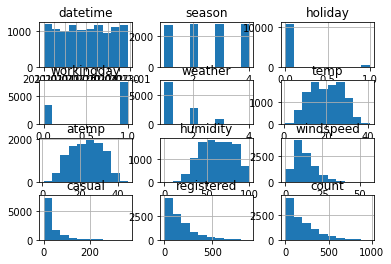

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [ ]:
# create a new feature
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d1b273ed0>,
      dtype=object)

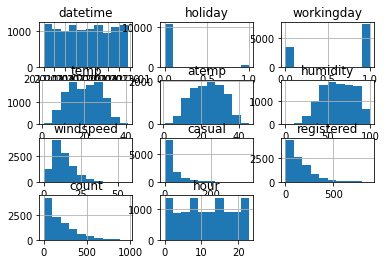

In [ ]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
predictor_new_features = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])],time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220722_032814/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220722_032814/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.035339      16.179540  528.140865                0.001084           0.315270            3       True         15
1          CatBoost_BAG_L2  -30.358407      14.980448  476.584208                0.126467          83.575508            2       True         13
2          LightGBM_BAG_L2  -30.425891      15.225509  418.198888                0.371527          25.190187            2       True         11
3        LightGBMXT_BAG_L2  -30.987886      15.680462  419.059900                0.826480          26.051200            2       True         10
4     ExtraTreesMSE_BAG_L2  -31.386524      15.522903  402.958201                0.668921           9.949501            2       True         14
5   RandomForestMSE_BAG_L2  -31.588202      15.516756  426.401959         

{'leaderboard':                      model   score_val  pred_time_val    fit_time  \
 0      WeightedEnsemble_L3  -30.035339      16.179540  528.140865   
 1          CatBoost_BAG_L2  -30.358407      14.980448  476.584208   
 2          LightGBM_BAG_L2  -30.425891      15.225509  418.198888   
 3        LightGBMXT_BAG_L2  -30.987886      15.680462  419.059900   
 4     ExtraTreesMSE_BAG_L2  -31.386524      15.522903  402.958201   
 5   RandomForestMSE_BAG_L2  -31.588202      15.516756  426.401959   
 6      WeightedEnsemble_L2  -32.168403      13.589319  345.704178   
 7          LightGBM_BAG_L1  -33.919639       2.769857   37.902639   
 8          CatBoost_BAG_L1  -33.981549       0.232574  208.866086   
 9        LightGBMXT_BAG_L1  -34.457274       9.897498   84.749267   
 10    ExtraTreesMSE_BAG_L1  -38.323016       0.762748    6.561508   
 11  RandomForestMSE_BAG_L1  -38.445932       0.583655   13.487760   
 12   KNeighborsDist_BAG_L1  -84.125061       0.104525    0.030672   
 13  

In [ ]:
# Remember to set all negative values to zero
new_predictor=predictor_new_features.predict(test)
new_predictor[new_predictor < 0] = 0

In [ ]:
submission_new_features = pd.read_csv("/content/sampleSubmission.csv", parse_dates=['datetime'])


In [ ]:
# Same submitting predictions
submission_new_features["count"] = new_predictor
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:03<00:00, 52.9kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-07-22 03:42:54  new features                       complete  1.97554      1.97554       
submission_new_hpo.csv       2022-07-21 03:31:37  new features with hyperparameters  complete  0.47708      0.47708       
submission.csv               2022-07-21 01:47:42  first raw submission               complete  1.84672      1.84672       
submission (2).csv           2022-07-17 02:50:39  My first submission                complete  1.84700      1.84700       


#### New Score of `1.97554`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
#(reference)https://github.com/awslabs/autogluon/blob/master/docs/tutorials/tabular_prediction/tabular-indepth.md

import autogluon.core as ag

nn_options = { 
    'num_epochs': 10, 
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1), 
}

gbm_options = { 
    'num_boost_round': 100,  
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),
}

hyperparameters = { 
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,
                  } 


num_trials = 5  
search_strategy = 'auto' 

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [ ]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])],time_limit=600, presets="best_quality", hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,)

No path specified. Models will be saved in: "AutogluonModels/ag-20220722_035708/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220722_035708/"
AutoGluon Version:  0.5.1
Python Version:     3.7.13
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator.

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L1/T1 ...
	-39.5016	 = Validation score   (-root_mean_squared_error)
	0.38s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-37.4217	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-36.9309	 = Validation score   (-root_mean_squared_error)
	0.41s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-118.3072	 = Validation score   (-root_mean_squared_error)
	0.33s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T5 ...
	-41.8771	 = Validation score   (-root_mean_squared_error)
	0.37s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 22.48s of the 597.34s of remaining time.
NaN or Inf found in input tensor.
Fitted model: NeuralNetTorch_BAG_L1/T1 ...
	-74.363	 = Validation score   (-

  0%|          | 0/5 [00:00<?, ?it/s]

Fitted model: LightGBM_BAG_L2/T1 ...
	-39.7424	 = Validation score   (-root_mean_squared_error)
	0.67s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-39.445	 = Validation score   (-root_mean_squared_error)
	0.55s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-39.5553	 = Validation score   (-root_mean_squared_error)
	0.6s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-102.3483	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T5 ...
	-40.0543	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.03s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 16.73s of the 293.85s of remaining time.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
NaN or Inf found in input tensor.
Fitted mod

In [ ]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -36.359334       3.250109  409.480009                0.000978           0.404367            3       True         18
1         LightGBM_BAG_L2/T2  -36.693133       2.300373  295.300299                0.140444          15.537653            2       True         12
2         LightGBM_BAG_L2/T3  -36.708703       2.366639  296.171121                0.206710          16.408475            2       True         13
3         LightGBM_BAG_L2/T1  -36.863874       2.337181  295.859997                0.177252          16.097351            2       True         11
4         LightGBM_BAG_L2/T5  -37.334307       2.320561  295.537030                0.160632          15.774384            2       True         15
5        WeightedEnsemble_L2  -38.064472       0.339403   30.2

{'leaderboard':                        model   score_val  pred_time_val    fit_time  \
 0        WeightedEnsemble_L3  -36.359334       3.250109  409.480009   
 1         LightGBM_BAG_L2/T2  -36.693133       2.300373  295.300299   
 2         LightGBM_BAG_L2/T3  -36.708703       2.366639  296.171121   
 3         LightGBM_BAG_L2/T1  -36.863874       2.337181  295.859997   
 4         LightGBM_BAG_L2/T5  -37.334307       2.320561  295.537030   
 5        WeightedEnsemble_L2  -38.064472       0.339403   30.229521   
 6         LightGBM_BAG_L1/T3  -38.381741       0.182095   15.246941   
 7         LightGBM_BAG_L1/T2  -39.177026       0.156623   14.506782   
 8   NeuralNetTorch_BAG_L2/T2  -39.592923       2.508390  328.845994   
 9         LightGBM_BAG_L1/T1  -40.251237       0.146289   14.600773   
 10  NeuralNetTorch_BAG_L2/T1  -42.809687       2.553517  328.046166   
 11        LightGBM_BAG_L1/T5  -43.181784       0.147482   14.483983   
 12  NeuralNetTorch_BAG_L1/T1  -68.915691       0

In [ ]:
# Remember to set all negative values to zero
new_predictor_hpo=predictor_new_hpo.predict(test)
new_predictor_hpo[new_predictor_hpo < 0] = 0

In [ ]:
submission_new_hpo = pd.read_csv("/content/sampleSubmission.csv", parse_dates=['datetime'])


In [ ]:
# Same submitting predictions
submission_new_hpo["count"] = new_predictor_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.47708`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

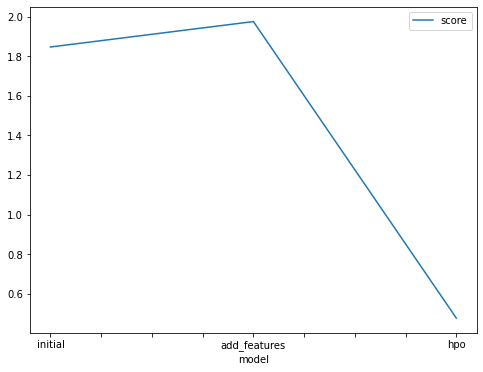

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [1.84700, 1.97554, 0.47708]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

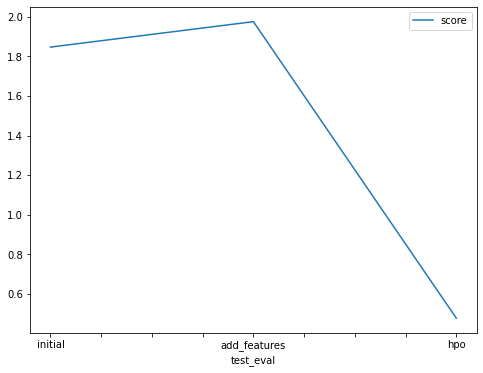

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84700, 1.97554, 0.47708]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [1.84700, 1.97554, 0.47708],
    "hpo2": [1.84700, 1.97554, 0.47708,
    "hpo3": [1.84700, 1.97554, 0.47708],
    "score": [1.84700, 1.97554, 0.47708]
})